**在深度学习中，当参数过多而训练样本又比较少时，模型容易产生过拟合现象。过拟合是很多深度学习乃至机器学习算法的通病，具体表现为在训练集上预测准确率高，而在测试集上准确率大幅下降。**2012年，Hinton等人提出了Dropout算法，可以比较有效地缓解过拟合现象的发生，起到一定正则化的效果。

Dropout的基本思想如图所示，在训练时，每个神经元以概率p保留，即以1-p的概率停止工作，每次前向传播保留下来的神经元都不同，这样可以使得模型不太依赖于某些局部特征，泛化性能更强。在测试时，为了保证相同的输出期望值，每个参数还要乘以p。当然还有另外一种计算方式称为Inverted Dropout，即在训练时将保留下的神经元乘以1/p，这样测试时就不需要再改变权重。

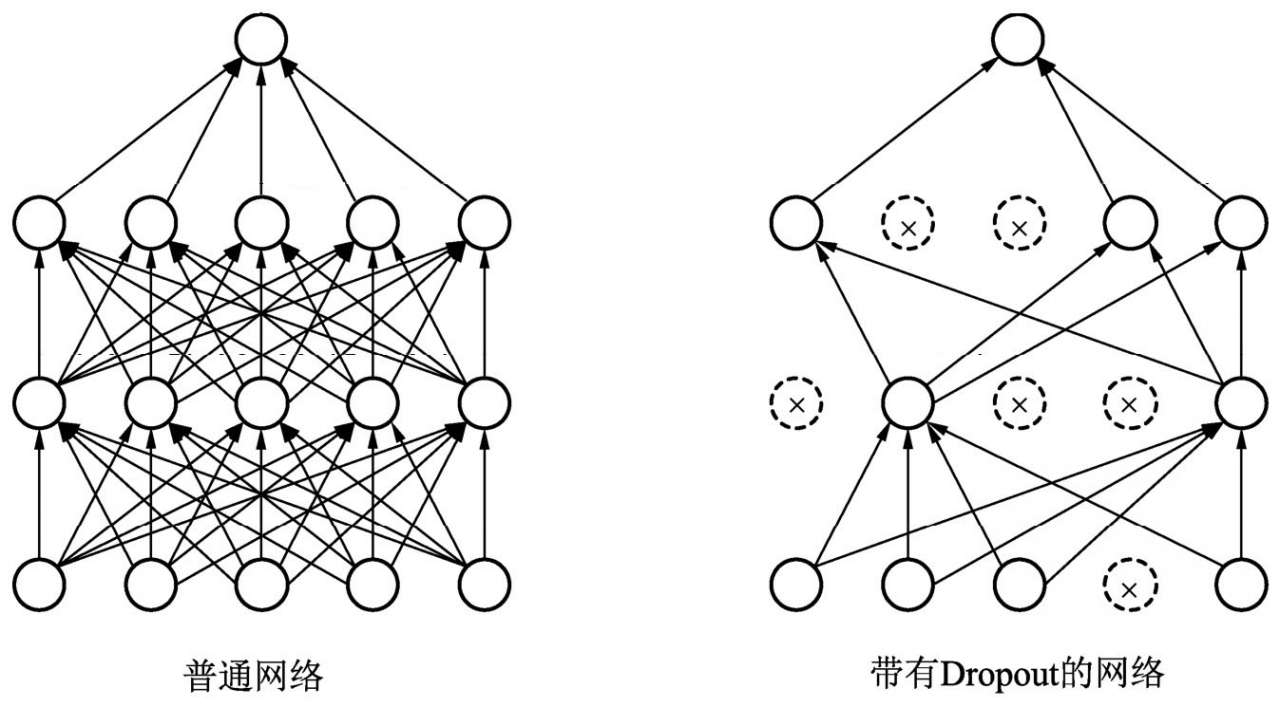

## Dropout可以防止过拟合的3个原因

### 1.多模型的平均
不同的固定神经网络会有不同的过拟合，多个取平均则有可能让一些相反的拟合抵消掉，而Dropout每次都是不同的神经元失活，可以看做是多个模型的平均，类似于多数投票取胜的策略。

### 2.减少神经元间的依赖
由于两个神经元不一定同时有效，因此减少了特征之间的依赖，迫使网络学习有更为鲁棒的特征，因为神经网络不应该对特定的特征敏感，而应该从众多特征中学习更为共同的规律，这也起到了正则化的效果。

### 3.生物进化
Dropout类似于性别在生物进化中的角色，物种为了适应环境变化，在繁衍时取雄性和雌性的各一半基因进行组合，这样可以适应更复杂的新环境，避免了单一基因的过拟合，当环境发生变化时也不至于灭绝。

In [1]:
import torch
from torch import nn

#PyTorch将元素置0来实现Dropout层，第一个参数为置0概率，第二个参数为是否原地操作
dropout = nn.Dropout(0.5, inplace=False)
input = torch.randn(2, 64, 7, 7)
output = dropout(input)
output

tensor([[[[ 0.0000, -0.0000, -0.0000,  ...,  0.0000, -0.4551,  0.0000],
          [-0.0000,  2.4560,  3.7795,  ..., -0.0000,  0.0000, -0.0000],
          [-0.0000, -0.0000,  0.0000,  ..., -2.3947,  1.7694,  0.0000],
          ...,
          [-2.9304, -0.0000,  1.1918,  ...,  0.0000,  0.0000, -1.9549],
          [ 0.0000, -1.1919,  1.2060,  ...,  0.0000, -1.2718,  0.0000],
          [-0.0000,  2.4266,  0.9577,  ..., -1.0096, -0.0000, -2.3985]],

         [[ 0.0629, -2.4875,  0.0000,  ..., -3.7713, -0.0000, -0.0000],
          [ 0.0887, -0.0000, -1.9468,  ...,  0.0000, -0.0000, -0.0000],
          [ 1.4961, -0.0000,  4.2522,  ..., -1.5140,  1.4759, -0.0138],
          ...,
          [-0.5818,  0.0000,  2.2027,  ...,  2.3040, -1.7714, -0.9532],
          [-0.0000, -4.4294,  0.5686,  ..., -0.0000,  0.0000, -0.0000],
          [-1.2455,  0.0000,  0.0000,  ..., -0.0000,  1.7674,  2.0769]],

         [[-0.0000, -0.6459,  0.0000,  ...,  1.7567, -0.0000, -2.1738],
          [-0.4190,  2.2015, -

Dropout被广泛应用到全连接层中，一般保留概率设置为0.5，而在较为稀疏的卷积网络中则一般使用下一节将要介绍的BN层来正则化模型，使得训练更稳定。